# Fuzzy Logic Project 1

## Özge Bülbül 2220765008

In [86]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score

In [ ]:
# Here I took random csvs but used random seed 42 to get the same randomized dataset each time.

random.seed(42)

no_sepsis_path = "sepsis_dataset-2/dataset/no_sepsis"
sepsis_path = "sepsis_dataset-2/dataset/sepsis"
num_files_to_pick = 225

def select_random_files(folder_path, num_files):
    files = os.listdir(folder_path)
    selected_files = random.sample(files, num_files)
    return [os.path.join(folder_path, file) for file in selected_files]

In [88]:
selected_no_sepsis = select_random_files(no_sepsis_path, num_files_to_pick)
selected_sepsis = select_random_files(sepsis_path, num_files_to_pick)

selected_files = selected_no_sepsis + selected_sepsis

print(f"Selected {len(selected_no_sepsis)} 'no_sepsis' files and {len(selected_sepsis)} 'sepsis' files.")

Selected 225 'no_sepsis' files and 225 'sepsis' files.


In [89]:
selected_no_sepsis

['sepsis_dataset-2/dataset/no_sepsis\\688.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\200.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\120.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\782.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\351.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\323.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\303.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\226.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\778.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\192.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\721.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\781.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\920.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\600.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\179.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\642.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\488.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\127.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\125.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\184.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\3.

In [ ]:
# This function below takes all csvs and merges their mean values so from 450 csvs it returns a 450 row, merged dataset.
def load_and_merge_csv_with_mean(file_list):
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        mean_df = df.mean().to_frame().T
        data_frames.append(mean_df)
    return pd.concat(data_frames, ignore_index=True)


In [91]:
merged_data = load_and_merge_csv_with_mean(selected_files)
print(f"Merged data shape: {merged_data.shape}")

Merged data shape: (450, 27)


In [92]:
merged_data.head()

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,91.416667,104.458333,60.791667,71.250000,19.500000,36.326389,98.000000,NaN,12.209524,12.619048,...,29.238095,11.176190,31.880952,3.947619,88.000000,15.000000,62.84,0.500000,0.000000,0.0
1,84.954545,130.818182,66.954545,85.772727,14.409091,36.809179,98.318182,50.0,5.066667,20.444444,...,25.222222,10.395238,27.565217,4.360870,104.428571,14.727273,65.75,0.086957,0.086957,0.0
2,100.571429,114.809524,52.714286,72.619048,18.000000,37.405000,99.238095,NaN,15.700000,14.000000,...,24.000000,9.028571,28.130000,4.004167,110.000000,12.142857,52.58,0.500000,0.000000,0.0
3,100.545455,111.000000,64.500000,75.681818,20.045455,36.934343,94.142857,NaN,6.400000,14.000000,...,30.000000,13.300000,41.600000,4.300000,102.000000,14.818182,81.23,0.181818,0.136364,0.0
4,94.652174,117.521739,62.086957,74.260870,17.130435,36.277778,93.391304,NaN,6.600000,26.000000,...,23.000000,9.900000,30.600000,4.600000,109.000000,14.000000,79.85,0.217391,0.086957,0.0


In [ ]:
merged_data['sepsis_icd'] = merged_data['sepsis_icd'].round().astype(int)   # I am turning sepsis_icd back into 0-1 values because it turned to float like 0.0 after taking mean

print(merged_data['sepsis_icd'].unique())

[0 1]


In [94]:
merged_data.head()

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,91.416667,104.458333,60.791667,71.250000,19.500000,36.326389,98.000000,NaN,12.209524,12.619048,...,29.238095,11.176190,31.880952,3.947619,88.000000,15.000000,62.84,0.500000,0.000000,0
1,84.954545,130.818182,66.954545,85.772727,14.409091,36.809179,98.318182,50.0,5.066667,20.444444,...,25.222222,10.395238,27.565217,4.360870,104.428571,14.727273,65.75,0.086957,0.086957,0
2,100.571429,114.809524,52.714286,72.619048,18.000000,37.405000,99.238095,NaN,15.700000,14.000000,...,24.000000,9.028571,28.130000,4.004167,110.000000,12.142857,52.58,0.500000,0.000000,0
3,100.545455,111.000000,64.500000,75.681818,20.045455,36.934343,94.142857,NaN,6.400000,14.000000,...,30.000000,13.300000,41.600000,4.300000,102.000000,14.818182,81.23,0.181818,0.136364,0
4,94.652174,117.521739,62.086957,74.260870,17.130435,36.277778,93.391304,NaN,6.600000,26.000000,...,23.000000,9.900000,30.600000,4.600000,109.000000,14.000000,79.85,0.217391,0.086957,0


Below, I did some visualization to detect correlations etc.

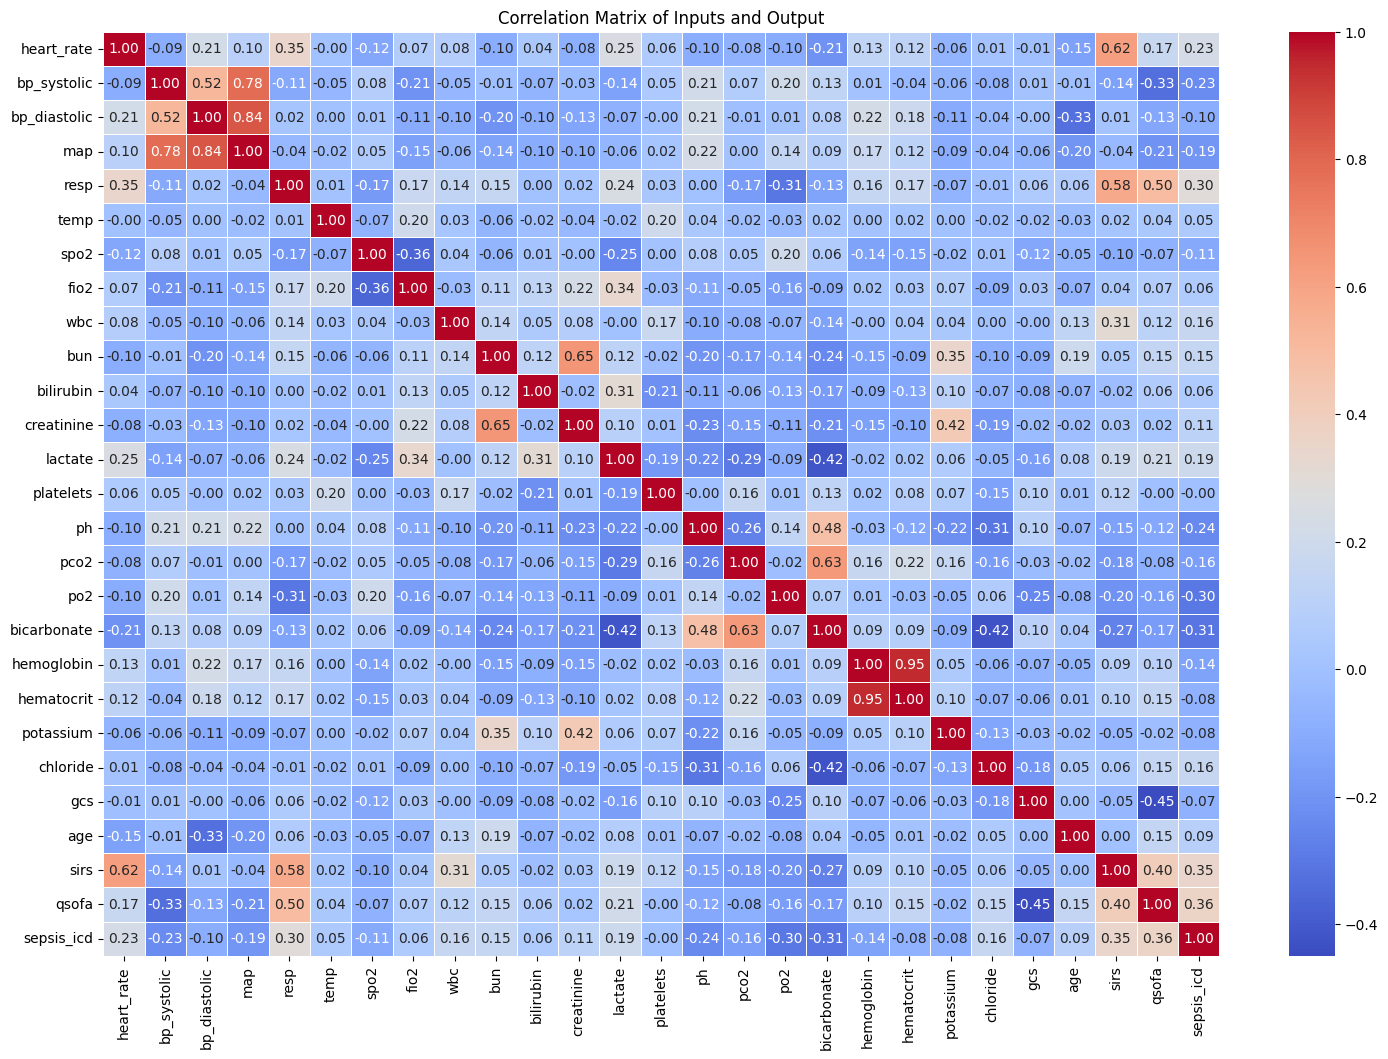

In [95]:
correlation_matrix = merged_data.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Inputs and Output")
plt.show()

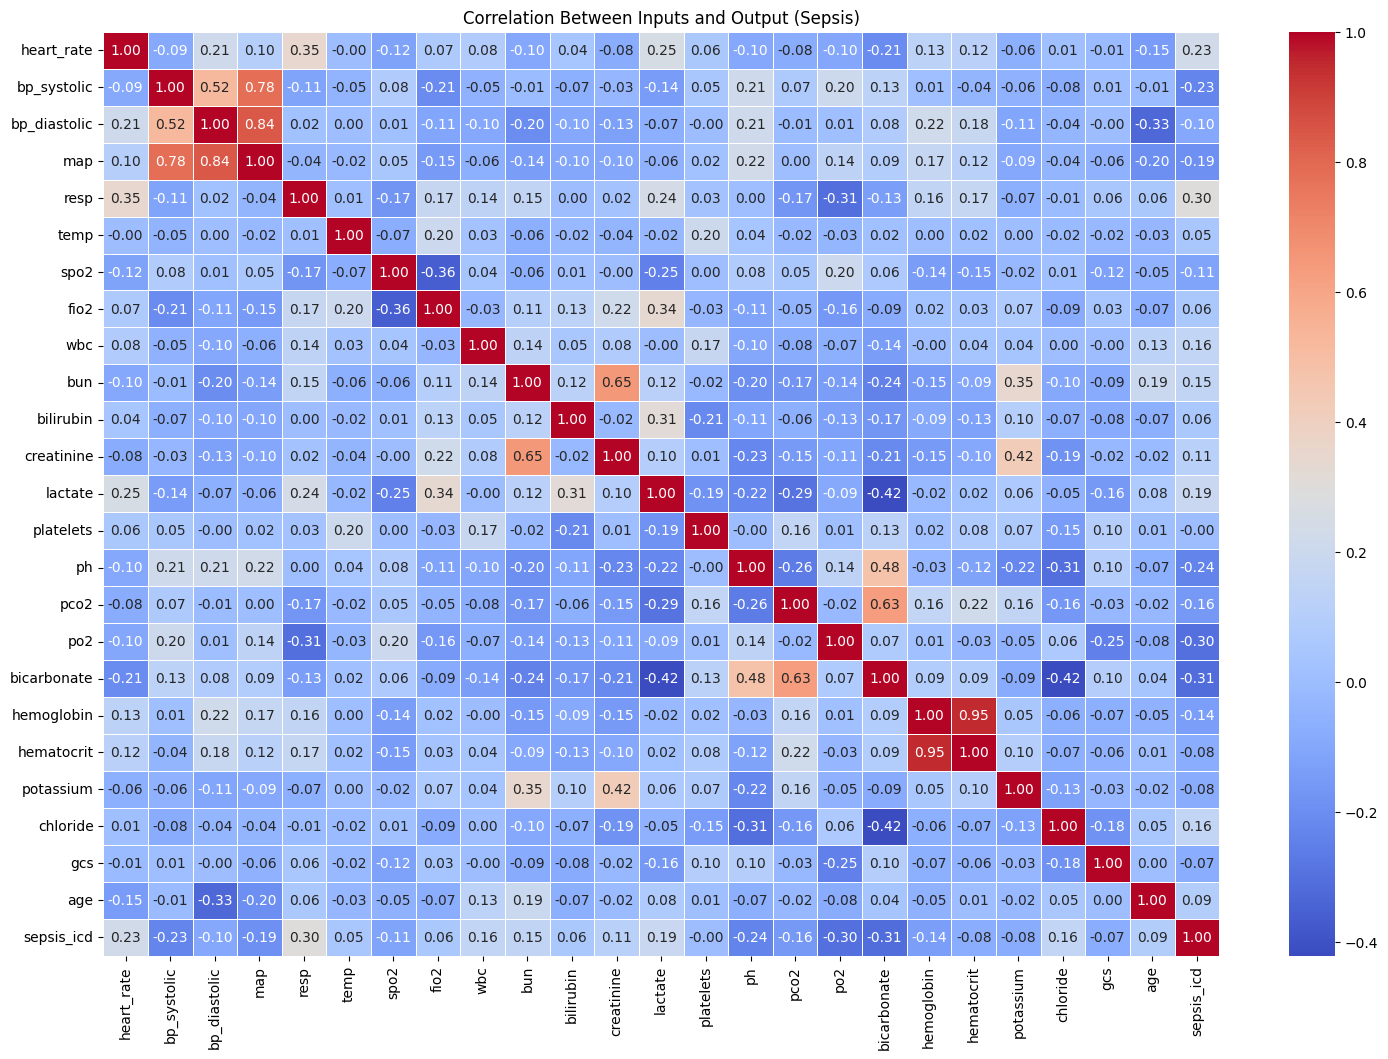

In [96]:
input_columns = ["heart_rate", "bp_systolic", "bp_diastolic", "map", "resp", "temp", "spo2", "fio2", "wbc", "bun", "bilirubin", "creatinine", "lactate", "platelets", "ph", "pco2", "po2", "bicarbonate", "hemoglobin", "hematocrit", "potassium", "chloride", "gcs", "age"]
output_column = 'sepsis_icd'

input_output_corr = merged_data[input_columns + [output_column]].corr()

plt.figure(figsize=(18, 12))
sns.heatmap(input_output_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Inputs and Output (Sepsis)")
plt.show()

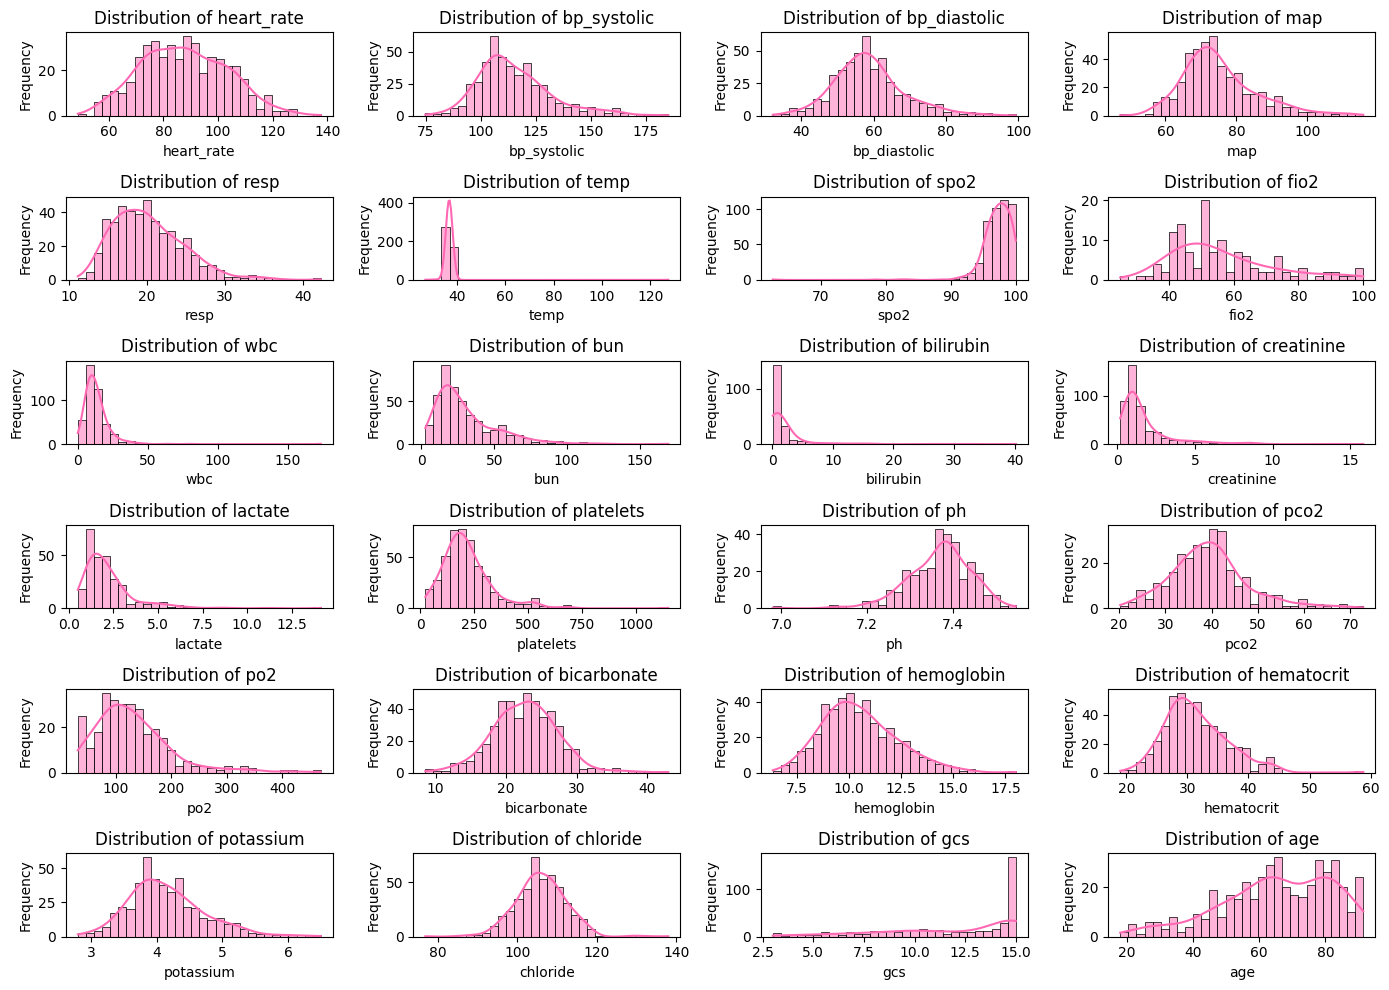

In [97]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(input_columns, 1):
    plt.subplot(6, 4, i)
    sns.histplot(merged_data[column], kde=True, color='hotpink', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

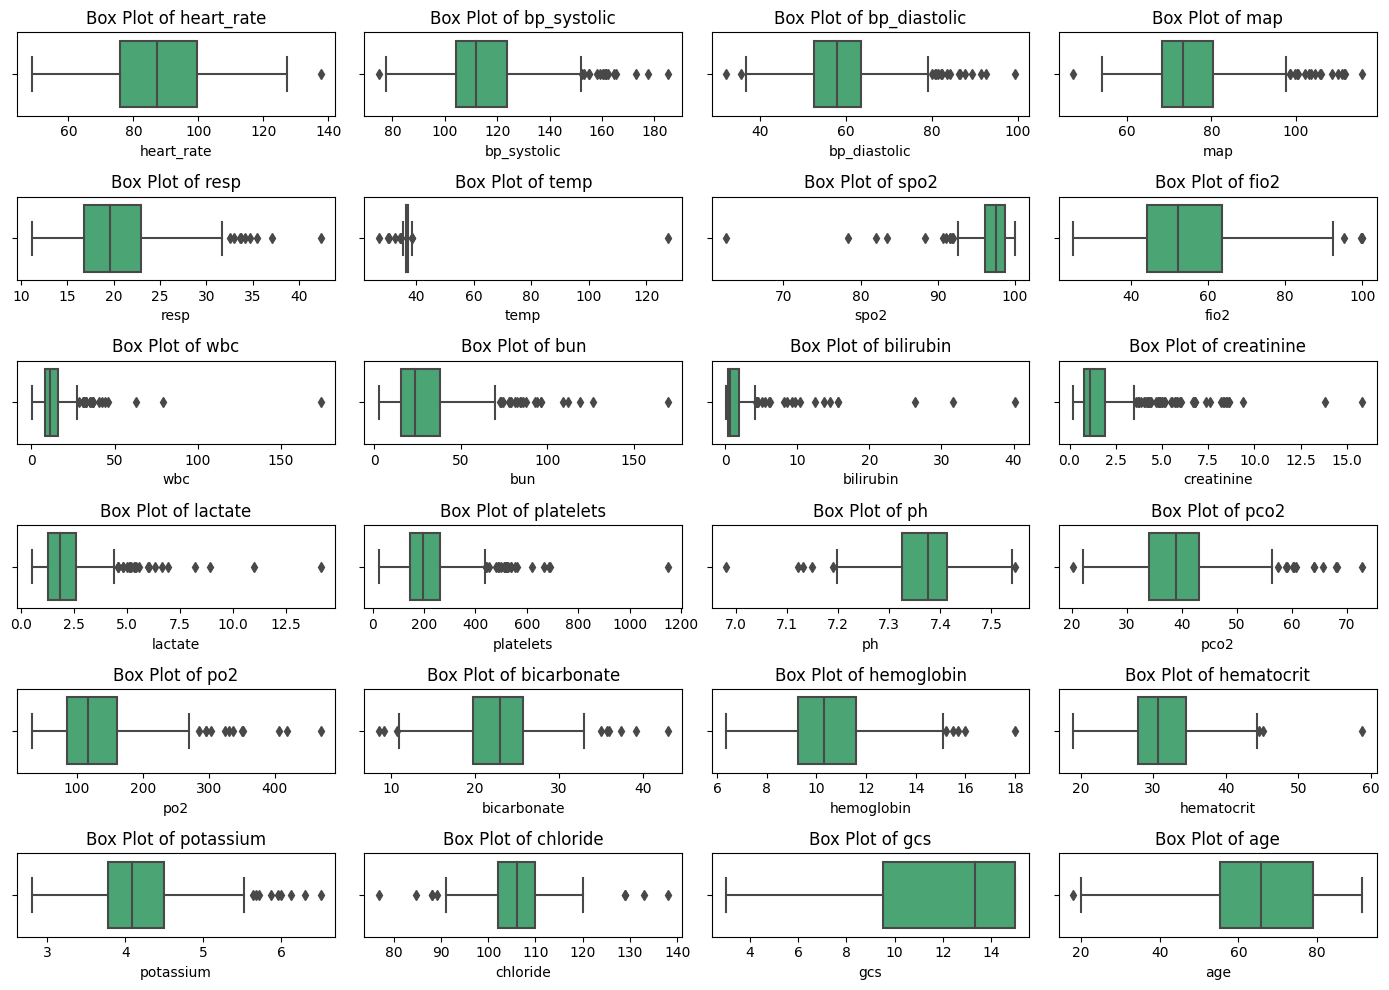

In [98]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(input_columns, 1):
    plt.subplot(6,4, i)
    sns.boxplot(x=merged_data[column], color='mediumseagreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

I reported my findings from these plots above in my report.

In [99]:
stats = merged_data[input_columns].agg(['min', 'max', 'std']).transpose()
stats.columns = ['Min', 'Max', 'Standard Deviation']

print("Statistical Summary of Parameters:")
print(stats)

# Count the number of positive (sepsis=1) and negative (sepsis=0) instances
positive_instances = merged_data[merged_data['sepsis_icd'] == 1].shape[0]
negative_instances = merged_data[merged_data['sepsis_icd'] == 0].shape[0]

print("\nNumber of Positive and Negative Instances:")
print(f"Positive Instances (Sepsis=1): {positive_instances}")
print(f"Negative Instances (Sepsis=0): {negative_instances}")

Statistical Summary of Parameters:
                    Min          Max  Standard Deviation
heart_rate    48.666667   137.583333           15.655354
bp_systolic   74.826087   185.083333           16.763080
bp_diastolic  32.142857    99.304348            9.765974
map           47.285704   115.708334           10.607908
resp          11.125000    42.333333            4.573012
temp          27.024154   127.416667            4.366006
spo2          62.565217   100.000000            2.779162
fio2          25.000000   100.000000           15.984692
wbc            0.100000   173.754545           11.202454
bun            2.666667   169.454545           21.620349
bilirubin      0.100000    40.205882            4.615799
creatinine     0.200000    15.836364            1.827012
lactate        0.500000    14.134783            1.574090
platelets     24.000000  1148.285714          119.465031
ph             6.980000     7.546364            0.073801
pco2          20.238095    72.842105            8.411

Below, I did missing value handling.

In [100]:
missing_values = merged_data.isnull().sum()
print(missing_values[missing_values > 0])


spo2             2
fio2           324
bilirubin      244
lactate        175
ph             139
pco2           152
po2            152
bicarbonate      1
hemoglobin       2
chloride         1
dtype: int64


In [ ]:
critical_columns = ['sirs', 'qsofa', 'sepsis_icd']  # Since these three features are output features, they are crucial for the model, therefore I dropped their null rows.
merged_data = merged_data.dropna(subset=critical_columns)
print(f"Data shape after dropping rows with null critical columns: {merged_data.shape}")
print(merged_data.isnull().sum())

Data shape after dropping rows with null critical columns: (450, 27)
heart_rate        0
bp_systolic       0
bp_diastolic      0
map               0
resp              0
temp              0
spo2              2
fio2            324
wbc               0
bun               0
bilirubin       244
creatinine        0
lactate         175
platelets         0
ph              139
pco2            152
po2             152
bicarbonate       1
hemoglobin        2
hematocrit        0
potassium         0
chloride          1
gcs               0
age               0
sirs              0
qsofa             0
sepsis_icd        0
dtype: int64


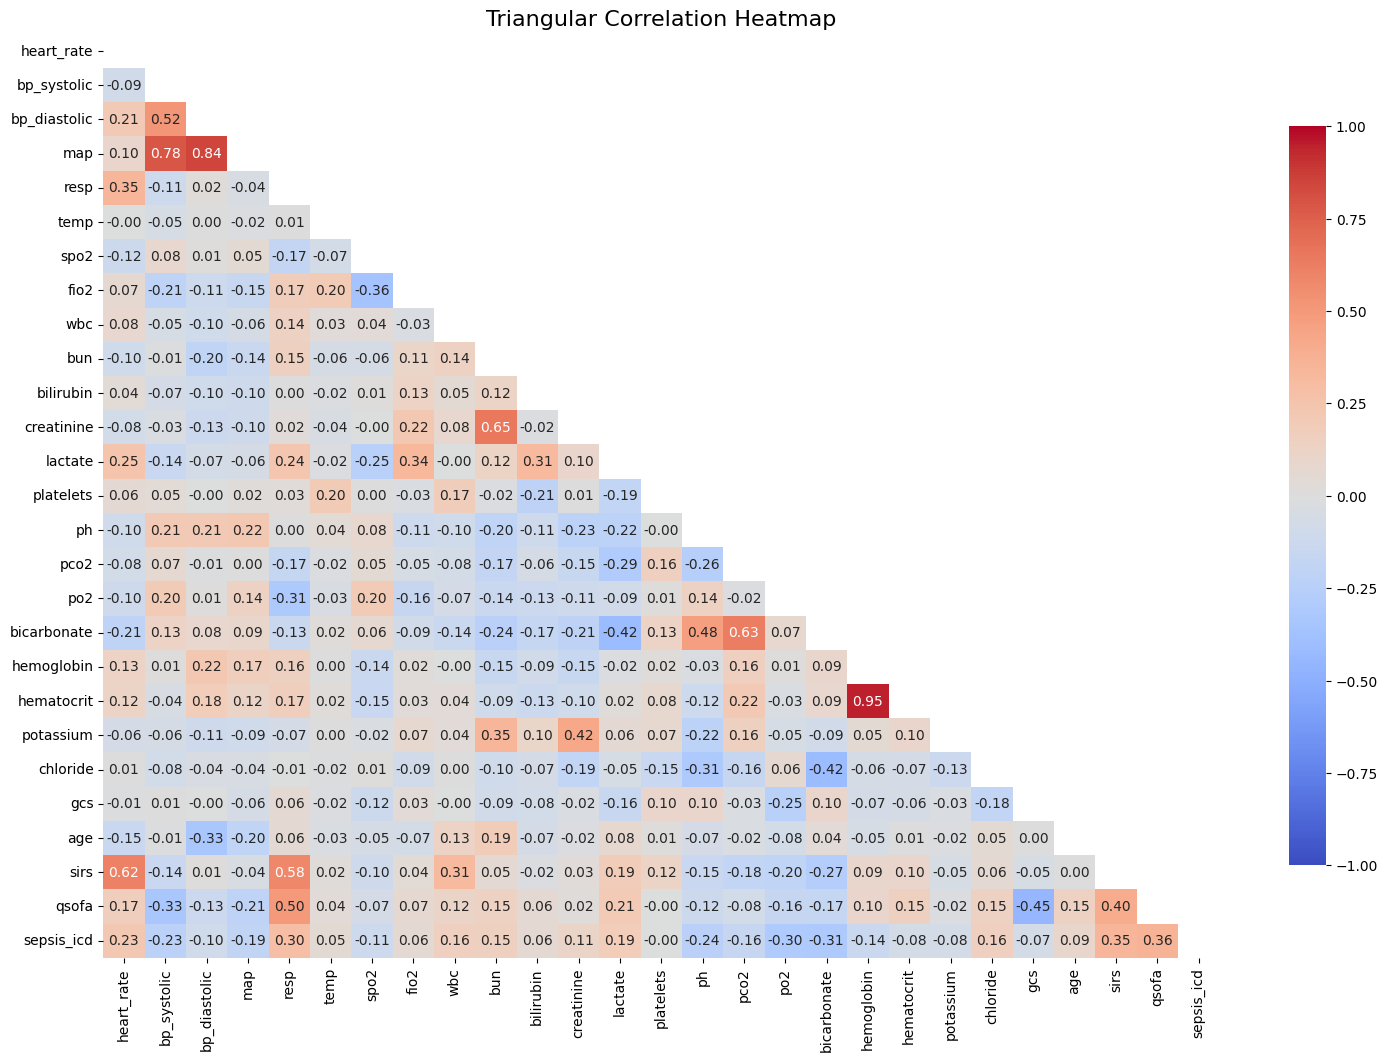

In [102]:
correlation_matrix = merged_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(18, 12))

sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    cmap="coolwarm", 
    annot=True, 
    fmt=".2f", 
    cbar_kws={"shrink": .8},
    vmin=-1, 
    vmax=1
)

plt.title("Triangular Correlation Heatmap", fontsize=16)
plt.show()

Below, I first printed the features with missing values less than 20% and filled them with median. Then I dropped the features with more than 50% nulls. Finally I decided to fill the rest of the null values with again, median.

In [103]:
# Columns with <20% missing values
low_missing_cols = merged_data.columns[(merged_data.isnull().mean() < 0.2) & (merged_data.isnull().mean() > 0)]
low_missing_cols

Index(['spo2', 'bicarbonate', 'hemoglobin', 'chloride'], dtype='object')

In [104]:
for col in low_missing_cols:
    merged_data[col].fillna(merged_data[col].median(), inplace=True)

# Drop high missingness columns (>50%)
high_missing_cols = merged_data.columns[merged_data.isnull().mean() > 0.4]
print(high_missing_cols)
merged_data.drop(columns=high_missing_cols, inplace=True)

# Verify remaining nulls and columns
print("Remaining null values:")
print(merged_data.isnull().sum())
print("\nRemaining columns:")
print(merged_data.columns)

Index(['fio2', 'bilirubin'], dtype='object')
Remaining null values:
heart_rate        0
bp_systolic       0
bp_diastolic      0
map               0
resp              0
temp              0
spo2              0
wbc               0
bun               0
creatinine        0
lactate         175
platelets         0
ph              139
pco2            152
po2             152
bicarbonate       0
hemoglobin        0
hematocrit        0
potassium         0
chloride          0
gcs               0
age               0
sirs              0
qsofa             0
sepsis_icd        0
dtype: int64

Remaining columns:
Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'wbc', 'bun', 'creatinine', 'lactate', 'platelets', 'ph',
       'pco2', 'po2', 'bicarbonate', 'hemoglobin', 'hematocrit', 'potassium',
       'chloride', 'gcs', 'age', 'sirs', 'qsofa', 'sepsis_icd'],
      dtype='object')


In [105]:
moderate_missing_cols = ['lactate', 'ph', 'pco2', 'po2']
for col in moderate_missing_cols:
    merged_data[col].fillna(merged_data[col].median(), inplace=True)

# Verify final dataset
print("Remaining null values:")
print(merged_data.isnull().sum())
print("\nFinal columns:")
print(merged_data.columns)

Remaining null values:
heart_rate      0
bp_systolic     0
bp_diastolic    0
map             0
resp            0
temp            0
spo2            0
wbc             0
bun             0
creatinine      0
lactate         0
platelets       0
ph              0
pco2            0
po2             0
bicarbonate     0
hemoglobin      0
hematocrit      0
potassium       0
chloride        0
gcs             0
age             0
sirs            0
qsofa           0
sepsis_icd      0
dtype: int64

Final columns:
Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'wbc', 'bun', 'creatinine', 'lactate', 'platelets', 'ph',
       'pco2', 'po2', 'bicarbonate', 'hemoglobin', 'hematocrit', 'potassium',
       'chloride', 'gcs', 'age', 'sirs', 'qsofa', 'sepsis_icd'],
      dtype='object')


In [106]:
correlation_matrix = merged_data.corr()

correlation_with_target = correlation_matrix['sepsis_icd'].sort_values(ascending=False)
print(correlation_with_target)

sepsis_icd      1.000000
qsofa           0.360494
sirs            0.345053
resp            0.295720
heart_rate      0.225882
lactate         0.183680
chloride        0.158443
wbc             0.156852
bun             0.153714
creatinine      0.111660
age             0.092800
temp            0.051723
platelets      -0.002300
gcs            -0.072771
hematocrit     -0.075887
potassium      -0.077259
bp_diastolic   -0.096919
spo2           -0.110434
pco2           -0.125985
hemoglobin     -0.138235
map            -0.193001
ph             -0.201148
bp_systolic    -0.230862
po2            -0.233416
bicarbonate    -0.311135
Name: sepsis_icd, dtype: float64


In [ ]:
threshold = 0.22    # I picked this threshold to continue on my analysis with only the most relevant features

selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()

print("\nSelected features based on correlation with target:")
print(selected_features)


Selected features based on correlation with target:
['sepsis_icd', 'qsofa', 'sirs', 'resp', 'heart_rate', 'bp_systolic', 'po2', 'bicarbonate']


In [ ]:
# New dataset with only the selected features
selected_data = merged_data[selected_features]

# Shape of the selected dataset
print("\nShape of the dataset with selected features:")
print(selected_data.shape)


Shape of the dataset with selected features:
(450, 8)


In [109]:
correlation_matrix_filtered = selected_data.corr()
correlation_with_target = correlation_matrix_filtered['sepsis_icd'].sort_values(ascending=False)
print(correlation_with_target)

sepsis_icd     1.000000
qsofa          0.360494
sirs           0.345053
resp           0.295720
heart_rate     0.225882
bp_systolic   -0.230862
po2           -0.233416
bicarbonate   -0.311135
Name: sepsis_icd, dtype: float64


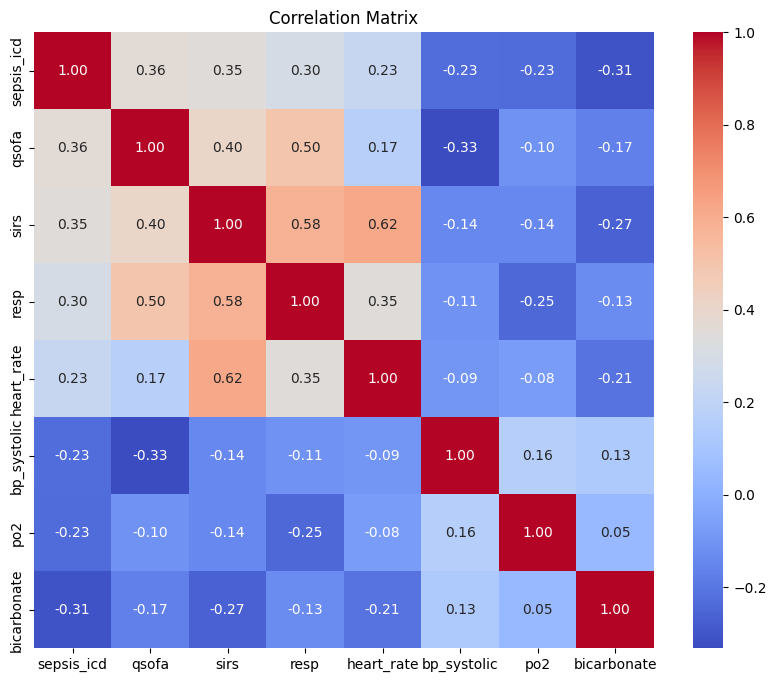

In [110]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [111]:
#!pip install scikit-fuzzy

Below, I printed mean of each selected input feature. Using the mean, min and max, I defined my fuzzy sets and visualized them.

In [112]:
selected_data['heart_rate'].mean()

87.59394688787006

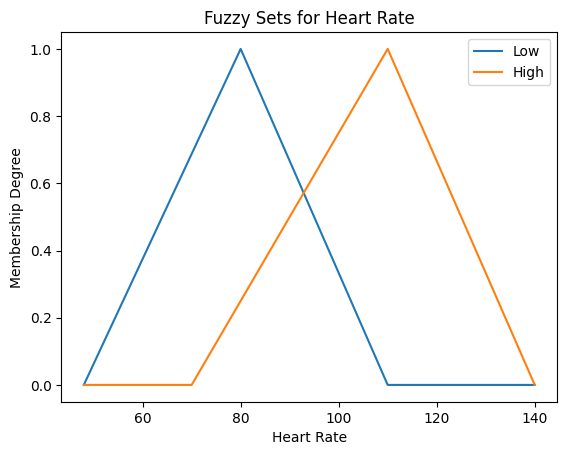

In [113]:
heart_rate = np.arange(48, 141, 1)

low_heart_rate = fuzz.trimf(heart_rate, [48, 80, 110])
high_heart_rate = fuzz.trimf(heart_rate, [70, 110, 140])

plt.plot(heart_rate, low_heart_rate, label="Low")
plt.plot(heart_rate, high_heart_rate, label="High")
plt.title("Fuzzy Sets for Heart Rate")
plt.xlabel("Heart Rate")
plt.ylabel("Membership Degree")
plt.legend()
plt.show()

In [114]:
selected_data['resp'].mean()

20.22649376503639

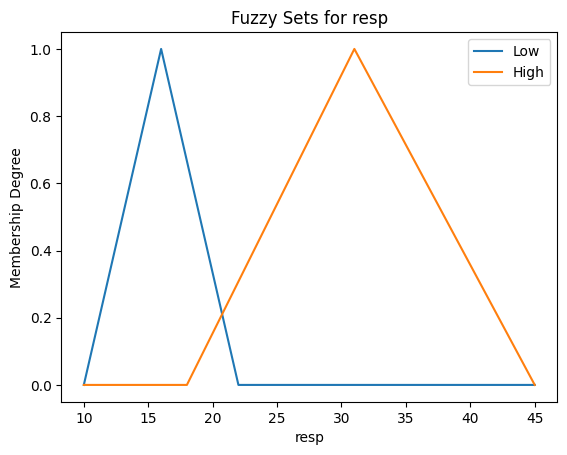

In [115]:
resp = np.arange(10, 46, 1)
low_resp = fuzz.trimf(resp, [10, 16, 22])
high_resp = fuzz.trimf(resp, [18, 31, 45])

plt.plot(resp, low_resp, label="Low")
plt.plot(resp, high_resp, label="High")
plt.title("Fuzzy Sets for resp")
plt.xlabel("resp")
plt.ylabel("Membership Degree")
plt.legend()
plt.show()

In [116]:
selected_data['bp_systolic'].mean()

115.22330027188943

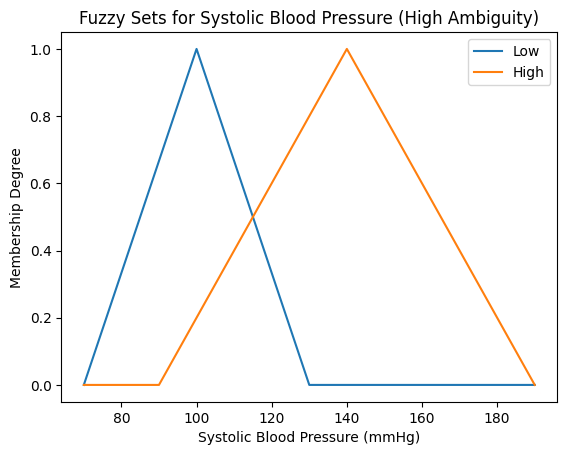

In [117]:
bp_systolic = np.arange(70, 191, 1)

low_bp_systolic = fuzz.trimf(bp_systolic, [70, 100, 130])
high_bp_systolic = fuzz.trimf(bp_systolic, [90, 140, 190])

plt.plot(bp_systolic, low_bp_systolic, label="Low")
plt.plot(bp_systolic, high_bp_systolic, label="High")
plt.title("Fuzzy Sets for Systolic Blood Pressure (High Ambiguity)")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Membership Degree")
plt.legend()
plt.show()

In [118]:
selected_data['po2'].mean()

125.52526749231451

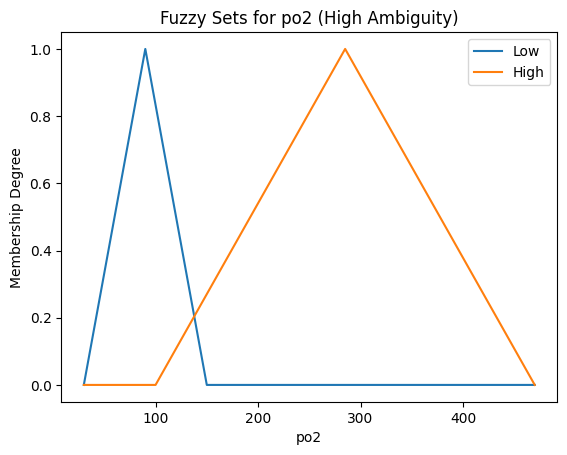

In [119]:
po2 = np.arange(30, 471, 1)

low_po2 = fuzz.trimf(po2, [30, 90, 150])
high_po2 = fuzz.trimf(po2, [100, 285, 470])

plt.plot(po2, low_po2, label="Low")
plt.plot(po2, high_po2, label="High")
plt.title("Fuzzy Sets for po2 (High Ambiguity)")
plt.xlabel("po2")
plt.ylabel("Membership Degree")
plt.legend()
plt.show()

In [120]:
selected_data['bicarbonate'].mean()

22.685199242423455

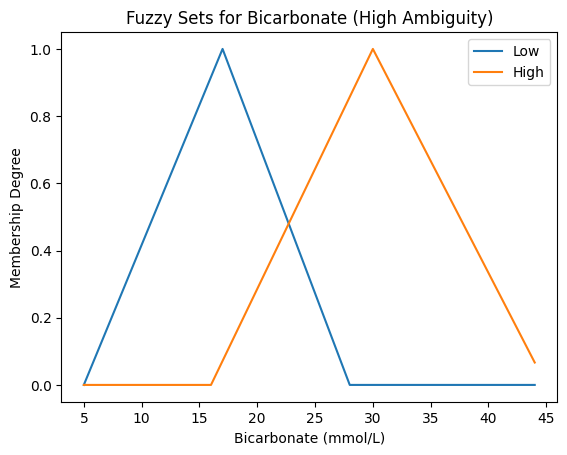

In [121]:
bicarbonate = np.arange(5, 45, 1)

low_bicarbonate = fuzz.trimf(bicarbonate, [5, 17, 28])
high_bicarbonate = fuzz.trimf(bicarbonate, [16, 30, 45])

plt.plot(bicarbonate, low_bicarbonate, label="Low")
plt.plot(bicarbonate, high_bicarbonate, label="High")
plt.title("Fuzzy Sets for Bicarbonate (High Ambiguity)")
plt.xlabel("Bicarbonate (mmol/L)")
plt.ylabel("Membership Degree")
plt.legend()
plt.show()

In [122]:
heart_rate = ctrl.Antecedent(np.arange(48, 141, 1), 'heart_rate')
resp = ctrl.Antecedent(np.arange(10, 46, 1), 'resp')
bicarbonate = ctrl.Antecedent(np.arange(5, 45, 1), 'bicarbonate')
po2 = ctrl.Antecedent(np.arange(30, 471, 1), 'po2')
bp_systolic = ctrl.Antecedent(np.arange(70, 191, 1), 'bp_systolic')

In [123]:
heart_rate['low'] = fuzz.trimf(heart_rate.universe, [48, 80, 110])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [70, 110, 140])

resp['low'] = fuzz.trimf(resp.universe, [10, 16, 22])
resp['high'] = fuzz.trimf(resp.universe, [18, 31, 45])

bicarbonate['low'] = fuzz.trimf(bicarbonate.universe, [5, 17, 28])
bicarbonate['high'] = fuzz.trimf(bicarbonate.universe, [16, 30, 45])

po2['low'] = fuzz.trimf(po2.universe, [30, 90, 150])
po2['high'] = fuzz.trimf(po2.universe, [100, 285, 470])

bp_systolic['low'] = fuzz.trimf(bp_systolic.universe, [70, 100, 130])
bp_systolic['high'] = fuzz.trimf(bp_systolic.universe, [90, 140, 190])


In [124]:
sepsis = ctrl.Consequent(np.arange(0, 2, 1), 'sepsis')
sepsis['no'] = fuzz.trimf(sepsis.universe, [0, 0, 1])
sepsis['yes'] = fuzz.trimf(sepsis.universe, [0, 1, 1])

## Experiment 1

Here I tried 4 very basic rules, using the positively correlated features in two rules and negaatives on the other two.

In [125]:
rule1 = ctrl.Rule(resp['high'] | heart_rate['high'], sepsis['yes'])
rule2 = ctrl.Rule(bicarbonate['high'] | po2['high'] | bp_systolic['high'], sepsis['no'])
rule3 = ctrl.Rule(resp['low'] | heart_rate['low'], sepsis['no'])
rule4 = ctrl.Rule(bp_systolic['low'] | po2['low'] | bicarbonate['low'], sepsis['yes'])

In [126]:
sepsis_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
sepsis_simulation = ctrl.ControlSystemSimulation(sepsis_control)

In [127]:
selected_data['predicted_sepsis'] = 0
selected_data['predicted_score'] = 0.0

C:\Users\zgebl\AppData\Local\Temp\ipykernel_18328\2217440563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['predicted_sepsis'] = 0
C:\Users\zgebl\AppData\Local\Temp\ipykernel_18328\2217440563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['predicted_score'] = 0.0


In [128]:
for idx, row in selected_data.iterrows():
    sepsis_simulation.input['resp'] = row['resp']
    sepsis_simulation.input['heart_rate'] = row['heart_rate']
    sepsis_simulation.input['bp_systolic'] = row['bp_systolic']
    sepsis_simulation.input['po2'] = row['po2']
    sepsis_simulation.input['bicarbonate'] = row['bicarbonate']
    sepsis_simulation.compute()
    selected_data.at[idx, 'predicted_score'] = sepsis_simulation.output.get('sepsis', 0)
    selected_data.at[idx, 'predicted_sepsis'] = 1 if sepsis_simulation.output.get('sepsis', 0) >= 0.5 else 0

predicted_score = sepsis_simulation.output.get('sepsis', 0)

In [129]:
selected_data

,sepsis_icd,qsofa,sirs,resp,heart_rate,bp_systolic,po2,bicarbonate,predicted_sepsis,predicted_score
0,0,0.000000,0.500000,19.500000,91.416667,104.458333,117.686335,29.238095,0,0.489736
1,0,0.086957,0.086957,14.409091,84.954545,130.818182,108.952381,25.222222,0,0.477650
2,0,0.000000,0.500000,18.000000,100.571429,114.809524,246.166667,24.000000,0,0.496276
3,0,0.136364,0.181818,20.045455,100.545455,111.000000,117.686335,30.000000,0,0.474058
4,0,0.086957,0.217391,17.130435,94.652174,117.521739,117.686335,23.000000,0,0.468354
...,...,...,...,...,...,...,...,...,...,...
445,1,0.958333,0.291667,23.958333,65.208333,102.416667,108.458333,24.608696,1,0.542888
446,1,0.958333,1.000000,33.708333,118.541667,107.208333,113.478261,10.714286,1,0.573091
447,1,0.142857,0.666667,25.500000,77.150000,109.842105,117.686335,17.285714,1,0.506163
448,1,0.250000,0.125000,19.625000,85.750000,98.541667,117.686335,24.666667,1,0.516186


Confusion Matrix:
[[150  75]
 [ 83 142]]
TPR (Sensitivity): 0.63
FPR (Fall-out): 0.33
TNR (Specificity): 0.67
FNR (Miss Rate): 0.37
Accuracy: 0.65
Precision: 0.65
Recall (Sensitivity/TPR): 0.63
F1 Score: 0.64
ROC AUC: 0.73


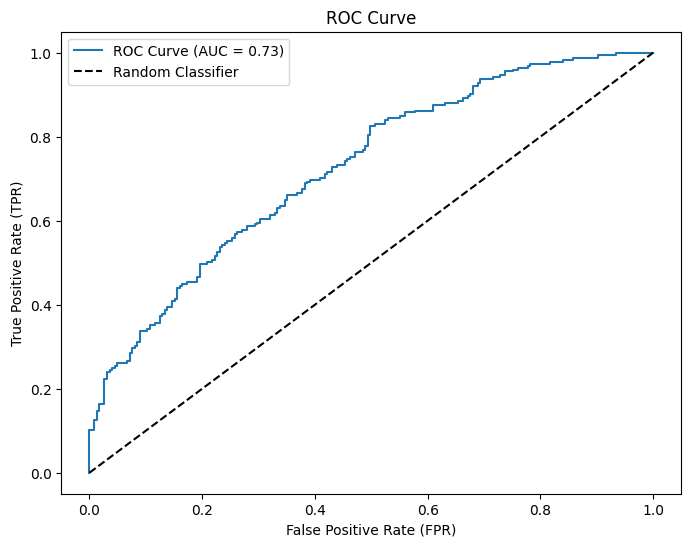

In [130]:
y_true = selected_data['sepsis_icd']
y_pred = selected_data['predicted_sepsis']
y_scores = selected_data['predicted_score']

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

fpr_values, tpr_values, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr_values, tpr_values)

print(f"Confusion Matrix:\n{cm}")
print(f"TPR (Sensitivity): {tpr:.2f}")
print(f"FPR (Fall-out): {fpr:.2f}")
print(f"TNR (Specificity): {tnr:.2f}")
print(f"FNR (Miss Rate): {fnr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity/TPR): {tpr:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Experiment 2

In this experiment I used the positively and negatively correlated features together.

In [131]:
rule1 = ctrl.Rule(resp['high'] & bp_systolic['low'] & po2['low'], sepsis['yes'])
rule2 = ctrl.Rule(bicarbonate['high'] & heart_rate['low'], sepsis['no'])
rule3 = ctrl.Rule(bp_systolic['high'] & po2['high'] & resp['low'], sepsis['no'])
rule4 = ctrl.Rule(bicarbonate['low'] & heart_rate['high'], sepsis['yes'])

In [132]:
sepsis_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
sepsis_simulation = ctrl.ControlSystemSimulation(sepsis_control)

In [133]:
selected_data['predicted_sepsis'] = 0
selected_data['predicted_score'] = 0.0

C:\Users\zgebl\AppData\Local\Temp\ipykernel_18328\2217440563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['predicted_sepsis'] = 0
C:\Users\zgebl\AppData\Local\Temp\ipykernel_18328\2217440563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['predicted_score'] = 0.0


In [134]:
for idx, row in selected_data.iterrows():
    sepsis_simulation.input['resp'] = row['resp']
    sepsis_simulation.input['heart_rate'] = row['heart_rate']
    sepsis_simulation.input['bp_systolic'] = row['bp_systolic']
    sepsis_simulation.input['po2'] = row['po2']
    sepsis_simulation.input['bicarbonate'] = row['bicarbonate']
    sepsis_simulation.compute()
    selected_data.at[idx, 'predicted_score'] = sepsis_simulation.output.get('sepsis', 0)
    selected_data.at[idx, 'predicted_sepsis'] = 1 if sepsis_simulation.output.get('sepsis', 0) >= 0.5 else 0

predicted_score = sepsis_simulation.output.get('sepsis', 0)


In [135]:
selected_data

,sepsis_icd,qsofa,sirs,resp,heart_rate,bp_systolic,po2,bicarbonate,predicted_sepsis,predicted_score
0,0,0.000000,0.500000,19.500000,91.416667,104.458333,117.686335,29.238095,0,0.401098
1,0,0.086957,0.086957,14.409091,84.954545,130.818182,108.952381,25.222222,0,0.428530
2,0,0.000000,0.500000,18.000000,100.571429,114.809524,246.166667,24.000000,0,0.476249
3,0,0.136364,0.181818,20.045455,100.545455,111.000000,117.686335,30.000000,0,0.466167
4,0,0.086957,0.217391,17.130435,94.652174,117.521739,117.686335,23.000000,0,0.492248
...,...,...,...,...,...,...,...,...,...,...
445,1,0.958333,0.291667,23.958333,65.208333,102.416667,108.458333,24.608696,0,0.486735
446,1,0.958333,1.000000,33.708333,118.541667,107.208333,113.478261,10.714286,1,0.629982
447,1,0.142857,0.666667,25.500000,77.150000,109.842105,117.686335,17.285714,1,0.592170
448,1,0.250000,0.125000,19.625000,85.750000,98.541667,117.686335,24.666667,0,0.444893


Confusion Matrix:
[[165  60]
 [ 91 134]]
TPR (Sensitivity): 0.60
FPR (Fall-out): 0.27
TNR (Specificity): 0.73
FNR (Miss Rate): 0.40
Accuracy: 0.66
Precision: 0.69
Recall (Sensitivity/TPR): 0.60
F1 Score: 0.64
ROC AUC: 0.73


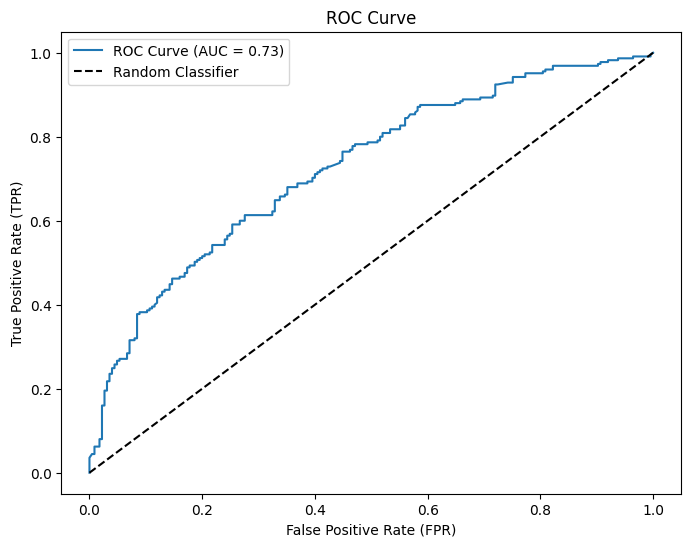

In [136]:
y_true = selected_data['sepsis_icd']
y_pred = selected_data['predicted_sepsis']
y_scores = selected_data['predicted_score']

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

fpr_values, tpr_values, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr_values, tpr_values)

print(f"Confusion Matrix:\n{cm}")
print(f"TPR (Sensitivity): {tpr:.2f}")
print(f"FPR (Fall-out): {fpr:.2f}")
print(f"TNR (Specificity): {tnr:.2f}")
print(f"FNR (Miss Rate): {fnr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity/TPR): {tpr:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Experiment 3
In this experiment I tried out some contradicting values. For instance, both heart rate and resp are positively correlated, I defined a rule that when heart rate is high but resp is low, sepsis is no because resp has a higher positive correlation than heart rate.


In [137]:
rule1 = ctrl.Rule(resp['high'] & bicarbonate['low'], sepsis['yes'])
rule2 = ctrl.Rule(bp_systolic['high'] & heart_rate['low'], sepsis['no'])
rule3 = ctrl.Rule(bp_systolic['low'] & bicarbonate['high'], sepsis['no'])  # because bicarbonate has higher negative correlation
rule4 = ctrl.Rule(po2['low'] & bicarbonate['high'], sepsis['no'])   # because bicarbonate has higher negative correlation
rule5 = ctrl.Rule(bp_systolic['high'] & bicarbonate['low'], sepsis['yes'])
rule6 = ctrl.Rule(resp['low'] & heart_rate['high'], sepsis['no'])  # because resp has higher correlation
rule7 = ctrl.Rule(resp['high'] & heart_rate['low'], sepsis['yes'])

In [138]:
sepsis_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
sepsis_simulation = ctrl.ControlSystemSimulation(sepsis_control)

In [139]:
selected_data['predicted_sepsis'] = 0
selected_data['predicted_score'] = 0.0

C:\Users\zgebl\AppData\Local\Temp\ipykernel_18328\2217440563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['predicted_sepsis'] = 0
C:\Users\zgebl\AppData\Local\Temp\ipykernel_18328\2217440563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['predicted_score'] = 0.0


In [140]:
for idx, row in selected_data.iterrows():
    sepsis_simulation.input['resp'] = row['resp']
    sepsis_simulation.input['heart_rate'] = row['heart_rate']
    sepsis_simulation.input['bp_systolic'] = row['bp_systolic']
    sepsis_simulation.input['po2'] = row['po2']
    sepsis_simulation.input['bicarbonate'] = row['bicarbonate']
    sepsis_simulation.compute()
    selected_data.at[idx, 'predicted_score'] = sepsis_simulation.output.get('sepsis', 0)
    selected_data.at[idx, 'predicted_sepsis'] = 1 if sepsis_simulation.output.get('sepsis', 0) >= 0.5 else 0

predicted_score = sepsis_simulation.output.get('sepsis', 0)


In [141]:
selected_data

,sepsis_icd,qsofa,sirs,resp,heart_rate,bp_systolic,po2,bicarbonate,predicted_sepsis,predicted_score
0,0,0.000000,0.500000,19.500000,91.416667,104.458333,117.686335,29.238095,0,0.374108
1,0,0.086957,0.086957,14.409091,84.954545,130.818182,108.952381,25.222222,0,0.409508
2,0,0.000000,0.500000,18.000000,100.571429,114.809524,246.166667,24.000000,0,0.449263
3,0,0.136364,0.181818,20.045455,100.545455,111.000000,117.686335,30.000000,0,0.409772
4,0,0.086957,0.217391,17.130435,94.652174,117.521739,117.686335,23.000000,0,0.470022
...,...,...,...,...,...,...,...,...,...,...
445,1,0.958333,0.291667,23.958333,65.208333,102.416667,108.458333,24.608696,0,0.470683
446,1,0.958333,1.000000,33.708333,118.541667,107.208333,113.478261,10.714286,1,0.606647
447,1,0.142857,0.666667,25.500000,77.150000,109.842105,117.686335,17.285714,1,0.530446
448,1,0.250000,0.125000,19.625000,85.750000,98.541667,117.686335,24.666667,0,0.415183


Confusion Matrix:
[[184  41]
 [125 100]]
TPR (Sensitivity): 0.44
FPR (Fall-out): 0.18
TNR (Specificity): 0.82
FNR (Miss Rate): 0.56
Accuracy: 0.63
Precision: 0.71
Recall (Sensitivity/TPR): 0.44
F1 Score: 0.55
ROC AUC: 0.67


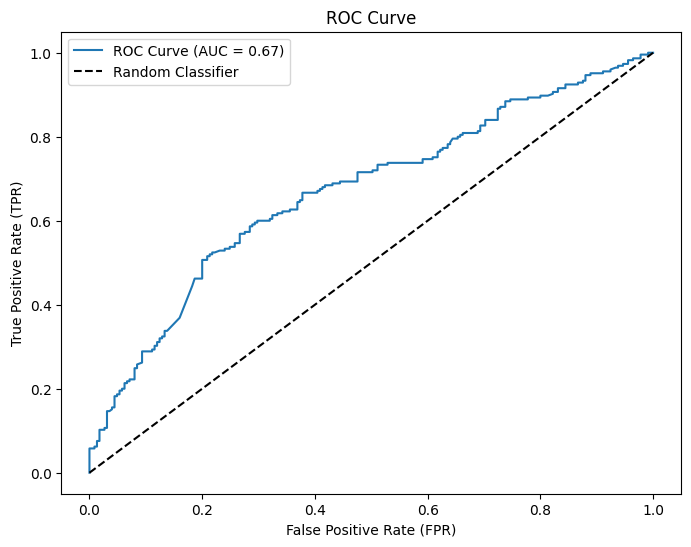

In [142]:
y_true = selected_data['sepsis_icd']
y_pred = selected_data['predicted_sepsis']
y_scores = selected_data['predicted_score']

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

fpr_values, tpr_values, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr_values, tpr_values)

print(f"Confusion Matrix:\n{cm}")
print(f"TPR (Sensitivity): {tpr:.2f}")
print(f"FPR (Fall-out): {fpr:.2f}")
print(f"TNR (Specificity): {tnr:.2f}")
print(f"FNR (Miss Rate): {fnr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity/TPR): {tpr:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Experiment 4
In this last experiment I expanded experiment 3's rule system to see whether the performance will improve or not.


In [143]:
rule1 = ctrl.Rule(resp['high'] & bp_systolic['low'], sepsis['yes'])
rule2 = ctrl.Rule(bicarbonate['high'] & heart_rate['low'], sepsis['no'])
rule3 = ctrl.Rule(bp_systolic['low'] & resp['high'], sepsis['yes'])
rule4 = ctrl.Rule(bicarbonate['low'] & heart_rate['high'], sepsis['yes'])
rule5 = ctrl.Rule(bp_systolic['low'] & bicarbonate['high'], sepsis['no'])  # because bicarbonate has higher negative correlation
rule6 = ctrl.Rule(bp_systolic['high'] & bicarbonate['low'], sepsis['yes'])
rule7 = ctrl.Rule(po2['high'] & bicarbonate['low'], sepsis['yes'])
rule8 = ctrl.Rule(po2['low'] & bicarbonate['high'], sepsis['no'])
rule9 = ctrl.Rule(resp['low'] & heart_rate['high'], sepsis['no'])  # because resp has higher correlation
rule10 = ctrl.Rule(resp['high'] & heart_rate['low'], sepsis['yes'])

In [144]:
sepsis_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
sepsis_simulation = ctrl.ControlSystemSimulation(sepsis_control)

In [145]:
selected_data['predicted_sepsis'] = 0
selected_data['predicted_score'] = 0.0

C:\Users\zgebl\AppData\Local\Temp\ipykernel_18328\2217440563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['predicted_sepsis'] = 0
C:\Users\zgebl\AppData\Local\Temp\ipykernel_18328\2217440563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['predicted_score'] = 0.0


In [146]:
for idx, row in selected_data.iterrows():
    sepsis_simulation.input['resp'] = row['resp']
    sepsis_simulation.input['heart_rate'] = row['heart_rate']
    sepsis_simulation.input['bp_systolic'] = row['bp_systolic']
    sepsis_simulation.input['po2'] = row['po2']
    sepsis_simulation.input['bicarbonate'] = row['bicarbonate']
    sepsis_simulation.compute()
    selected_data.at[idx, 'predicted_score'] = sepsis_simulation.output.get('sepsis', 0)
    selected_data.at[idx, 'predicted_sepsis'] = 1 if sepsis_simulation.output.get('sepsis', 0) >= 0.5 else 0

predicted_score = sepsis_simulation.output.get('sepsis', 0)


In [147]:
selected_data

,sepsis_icd,qsofa,sirs,resp,heart_rate,bp_systolic,po2,bicarbonate,predicted_sepsis,predicted_score
0,0,0.000000,0.500000,19.500000,91.416667,104.458333,117.686335,29.238095,0,0.374108
1,0,0.086957,0.086957,14.409091,84.954545,130.818182,108.952381,25.222222,0,0.428530
2,0,0.000000,0.500000,18.000000,100.571429,114.809524,246.166667,24.000000,0,0.449263
3,0,0.136364,0.181818,20.045455,100.545455,111.000000,117.686335,30.000000,0,0.409772
4,0,0.086957,0.217391,17.130435,94.652174,117.521739,117.686335,23.000000,0,0.470022
...,...,...,...,...,...,...,...,...,...,...
445,1,0.958333,0.291667,23.958333,65.208333,102.416667,108.458333,24.608696,0,0.470683
446,1,0.958333,1.000000,33.708333,118.541667,107.208333,113.478261,10.714286,1,0.651150
447,1,0.142857,0.666667,25.500000,77.150000,109.842105,117.686335,17.285714,1,0.598525
448,1,0.250000,0.125000,19.625000,85.750000,98.541667,117.686335,24.666667,0,0.444893


Confusion Matrix:
[[163  62]
 [ 89 136]]
TPR (Sensitivity): 0.60
FPR (Fall-out): 0.28
TNR (Specificity): 0.72
FNR (Miss Rate): 0.40
Accuracy: 0.66
Precision: 0.69
Recall (Sensitivity/TPR): 0.60
F1 Score: 0.64
ROC AUC: 0.70


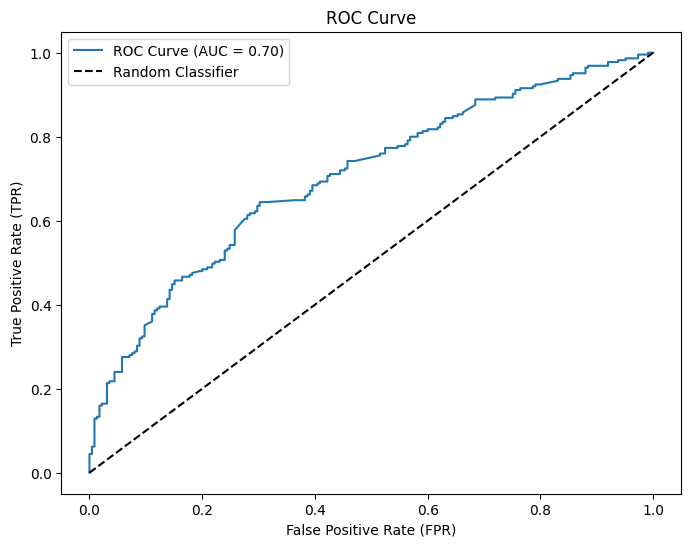

In [148]:
y_true = selected_data['sepsis_icd']
y_pred = selected_data['predicted_sepsis']
y_scores = selected_data['predicted_score']

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

fpr_values, tpr_values, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr_values, tpr_values)

print(f"Confusion Matrix:\n{cm}")
print(f"TPR (Sensitivity): {tpr:.2f}")
print(f"FPR (Fall-out): {fpr:.2f}")
print(f"TNR (Specificity): {tnr:.2f}")
print(f"FNR (Miss Rate): {fnr:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity/TPR): {tpr:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

Experiment 1: <br>
Confusion Matrix:
<br>[[150  75]
<br> [ 83 142]]
<br>TPR (Sensitivity): 0.63
<br>FPR (Fall-out): 0.33
<br>TNR (Specificity): 0.67
<br>FNR (Miss Rate): 0.37
<br>Accuracy: 0.65
<br>Precision: 0.65
<br>Recall (Sensitivity/TPR): 0.63
<br>F1 Score: 0.64
<br>ROC AUC: 0.73
<br>
<br>Experiment 2: <br>
Confusion Matrix:
<br>[[165  60]
<br> [ 91 134]]
<br>TPR (Sensitivity): 0.60
<br>FPR (Fall-out): 0.27
<br>TNR (Specificity): 0.73
<br>FNR (Miss Rate): 0.40
<br>Accuracy: 0.66
<br>Precision: 0.69
<br>Recall (Sensitivity/TPR): 0.60
<br>F1 Score: 0.64
<br>ROC AUC: 0.73
<br>
<br>
Experiment 3: <br>
Confusion Matrix:
<br>[[184  41]
<br> [125 100]]
<br>TPR (Sensitivity): 0.44
<br>FPR (Fall-out): 0.18
<br>TNR (Specificity): 0.82
<br>FNR (Miss Rate): 0.56
<br>Accuracy: 0.63
<br>Precision: 0.71
<br>Recall (Sensitivity/TPR): 0.44
<br>F1 Score: 0.55
<br>ROC AUC: 0.67

Experiment 4: <br>
Confusion Matrix:
<br>[[163  62]
<br> [ 89 136]]
<br>TPR (Sensitivity): 0.60
<br>FPR (Fall-out): 0.28
<br>TNR (Specificity): 0.72
<br>FNR (Miss Rate): 0.40
<br>Accuracy: 0.66
<br>Precision: 0.69
<br>Recall (Sensitivity/TPR): 0.60
<br>F1 Score: 0.64
<br>ROC AUC: 0.70












After my comparisons, I picked experiment 2 and explained my reasoning in my report.